Main Python code to perform the simulation and display results

In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

In [2]:
massfactor = 10**24 # [kg]

Generate random body system:

In [3]:
count = 100

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*au

In [5]:
bodies = np.dot(masses := np.array([_ for _ in massGen()]), positions := np.array([__ for __ in positionGen()]))

Show the system:

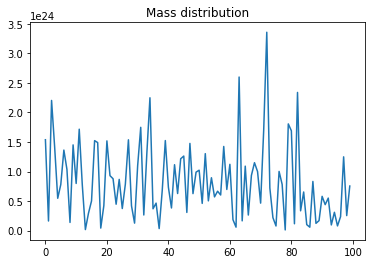

In [6]:
plt.title('Mass distribution')
plt.plot(masses)

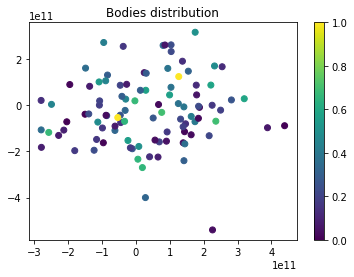

In [7]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

In [8]:
from sys import getsizeof

In [9]:
getsizeof(bodies)  # np.dot - 2x więcej niż zip

128

In [10]:
getsizeof(masses)

912

In [11]:
getsizeof(positions)

1728